In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
! wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data

--2023-07-09 14:28:57--  https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja [following]
--2023-07-09 14:28:57--  https://www.dropbox.com/sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3a35285737a0942794f26342f7.dl.dropboxusercontent.com/zip_download_get/Bi7XUUq5jTVFJyXlBg7Eq3xg9o27E2Uy61LBcZ8GQrZdPHicEFiYiscpbYu6vtXAaOeGRowttZTT5OymFu4Zd9k4U92xe2ZeW2p3h6Wda3zMUw# [following]
--2023-07-09 14:28:58--  https://uc3a35285737a0942794f26342f7.dl.dropboxusercontent.com/zip_download_get/Bi7XUUq5jTVFJyXlBg7Eq3xg9o27E2Uy61LBcZ8GQrZdPHicEFiYiscpbYu6vtXAaOeGRowttZTT5OymFu4Zd9k4U92xe2ZeW

In [3]:
!unzip data -d "images/"

Archive:  data
mapname:  conversion of  failed
   creating: images/Test/
   creating: images/Train/
   creating: images/Test/Pikachu/
   creating: images/Train/Pikachu/
   creating: images/Test/Bulbasaur/
   creating: images/Train/Bulbasaur/
   creating: images/Test/Charmander/
   creating: images/Train/Charmander/
 extracting: images/Train/Pikachu/345.jpg  
 extracting: images/Train/Pikachu/335.jpg  
 extracting: images/Train/Pikachu/299.jpg  
 extracting: images/Train/Pikachu/396.jpg  
 extracting: images/Train/Pikachu/350.jpg  
 extracting: images/Train/Pikachu/308.jpg  
 extracting: images/Train/Pikachu/346.jpg  
 extracting: images/Train/Pikachu/355.jpg  
 extracting: images/Train/Pikachu/353.jpg  
 extracting: images/Train/Pikachu/390.jpg  
 extracting: images/Train/Pikachu/319.jpg  
 extracting: images/Train/Pikachu/386.jpg  
 extracting: images/Train/Pikachu/327.jpg  
 extracting: images/Train/Pikachu/314.jpg  
 extracting: images/Train/Pikachu/303.jpg  
 extracting: images/Tra

In [4]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00


In [5]:
classes = os.listdir("images/Train")

In [6]:
classes

['Charmander', 'Pikachu', 'Bulbasaur']

In [7]:
for pokemon_type in classes:
  path = "images/Train/" + pokemon_type
  print(f"{pokemon_type} - {len(os.listdir(path))}")

Charmander - 102
Pikachu - 101
Bulbasaur - 101


In [8]:
from keras_preprocessing import image

In [9]:
train_data= []
train_labels = []

In [10]:
for category in classes:

  folder = f"images/Train/{category}"

  for image_name in os.listdir(folder):

    img_path = os.path.join(folder, image_name)




    img = image.load_img(img_path, target_size=(100, 100))

    img_array = image.img_to_array(img)

    train_data.append(img_array)

    train_labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
len(train_data)

304

In [13]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [14]:
train_data = train_data.reshape(len(train_data),30000)

In [15]:
train_data.shape

(304, 30000)

In [16]:
category2label = {"Pikachu": 0,"Charmander":1, "Bulbasaur": 2}
label2category = {0:"Pikachu", 1:"Charmander", 2:"Bulbasaur"}

In [17]:
train_labels = np.array([category2label[label] for label in train_labels])

In [18]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)

In [19]:
from keras.layers import Dense

from keras import Sequential

In [20]:
features = train_data.shape[1]

In [21]:
model = Sequential()

In [22]:
model.add( Dense(units=512, activation='relu', input_shape=(features,)))

In [23]:
model.add( Dense(units=256, activation='relu' ) )

model.add( Dense(units=128, activation='relu' ) )

model.add( Dense(units=64, activation='relu' ) )

model.add( Dense(units=3, activation='softmax' ) )

In [24]:
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=['accuracy'] )

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15360512  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15,533,187
Trainable params: 15,533,187
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(train_data, train_labels, batch_size=32, epochs=50)

Epoch 1/50
10/10 [==============================] - 4s 261ms/step - loss: 2116.8215 - accuracy: 0.3191
Epoch 2/50
10/10 [==============================] - 3s 260ms/step - loss: 990.5405 - accuracy: 0.4342
Epoch 3/50
10/10 [==============================] - 3s 275ms/step - loss: 800.7842 - accuracy: 0.4803
Epoch 4/50
10/10 [==============================] - 4s 340ms/step - loss: 348.9493 - accuracy: 0.6184
Epoch 5/50
10/10 [==============================] - 3s 263ms/step - loss: 175.2726 - accuracy: 0.6941
Epoch 6/50
10/10 [==============================] - 3s 263ms/step - loss: 46.3413 - accuracy: 0.8553
Epoch 7/50
10/10 [==============================] - 3s 261ms/step - loss: 58.8363 - accuracy: 0.8586
Epoch 8/50
10/10 [==============================] - 4s 364ms/step - loss: 45.5142 - accuracy: 0.8355
Epoch 9/50
10/10 [==============================] - 3s 265ms/step - loss: 42.0737 - accuracy: 0.8355
Epoch 10/50
10/10 [==============================] - 3s 266ms/step - loss: 94.0269 - 

In [27]:
test_image = "/content/pikachu.jpeg"

img = image.load_img(test_image,target_size=(100,100))
img = image.img_to_array(img)
img.shape


(100, 100, 3)

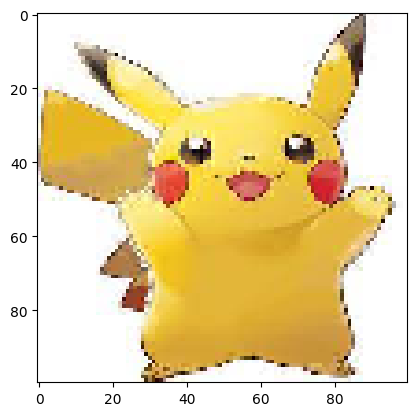

In [28]:
plt.imshow(img.astype('int'));

In [29]:
img = img.reshape(1,30000)

In [32]:
model.predict(img).argmax()

1/1 [==============================] - 0s 221ms/step


0

In [37]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 32ms/step


'Pikachu'